CS 7641 Assignment 3 Code

name: Ahmad Moltafet

GTID: 903959012

Analysis Report: https://www.overleaf.com/read/ttjmhnqbzfrf#5402f0

Github Repo: https://github.com/amoltafet/ml3

2 datasets are used in this code:
- 1. Aids 15000 Classification (https://www.kaggle.com/datasets/aadarshvelu/aids-virus-infection-prediction)
- 2. Students Performance in Exams (https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?resource=download)

--- IMPORTANT NOTE:
 YOU CAN FIND THE CODE IN THE FOLLOWING LINK WITH THE OUTPUTS:
https://colab.research.google.com/drive/1CE6ZEMV67yEhFi3AxK-jSn_zigS_c5fD#scrollTo=7S_aSBfvkNPT

# Setup

In [27]:
#### ----- 1 - Loading All Data and Preprocessing ----- ####

import pandas as pd
import os
import random
import numpy as np
import matplotlib.pyplot as plt

get_ipython().run_line_magic('matplotlib', 'inline')
plt.style.use('ggplot')
current_path = os.getcwd()
os.chdir(current_path)
print("Current Directory:", os.getcwd())

df_aids = pd.read_csv('AIDS_Classification_5000.csv').astype('category')
df_aids = df_aids.head(1000)
print("Aids Data has",len(df_aids),"rows and", len(df_aids.columns),"columns.")
if df_aids.isnull().values.any():
    print("Warning: Missing Data")
#df_phish.head()
#df_phish.describe(include='all')

## Load the Students Performance Data

df_thy = pd.read_csv('StudentsPerformance.csv')
df_thy = df_thy.drop(columns=['parental level of education'])
# drop all none numerical
df_thy = df_thy.select_dtypes(include=['int64', 'float64'])
df_thy = df_thy.head(1000)
print("Students Performance has",len(df_thy),"rows and", len(df_thy.columns),"columns.")
if df_thy.isnull().values.any():
    print("Warning: Missing Data")
#df_bank.head()
#df_bank.describe(include='all')

# Preprossesing Aids Classification Dataset:

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

# Numerical features
aids_numerical_features = ['time', 'age', 'wtkg', 'karnof', 'preanti', 'cd40', 'cd420', 'cd80', 'cd820']
# Binary features
aids_binary_features = ['hemo', 'homo', 'drugs', 'oprior', 'z30', 'symptom', 'treat', 'offtrt']
# Categorical features
aids_categorical_features = ['trt', 'race', 'gender', 'strat']

aids_numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

aids_categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine preprocessing steps
aids_preprocessor = ColumnTransformer(
    transformers=[
        ('num', aids_numerical_transformer, aids_numerical_features),
        ('cat', aids_categorical_transformer, aids_categorical_features),
        ('bin', 'passthrough', aids_binary_features)
    ])

# Separate features and target
X = df_aids.drop(columns=['infected'])
y = df_aids['infected']

# Apply preprocessing
X_preprocessed = aids_preprocessor.fit_transform(X)

# Convert the preprocessed data back to a DataFrame
X_preprocessed_df = pd.DataFrame(X_preprocessed)

def load_data(df_aids, df_thy):
    """Extracts features and labels from the given dataframes."""
    X_aids = df_aids.iloc[:, 1:-1].values.astype('int64')
    y_aids = df_aids.iloc[:, 0].values.astype('int64')
    X_thy = df_thy.iloc[:, 1:-1].values.astype('int64')
    y_thy = df_thy.iloc[:, 0].values.astype('int64')
    return X_aids, y_aids, X_thy, y_thy

X_aids, y_aids, X_thy, y_thy = load_data(df_aids, df_thy)

Current Directory: /content
Aids Data has 1000 rows and 23 columns.
Mumbai has 1000 rows and 3 columns.


# Clustering Algorithms

[2 1 2 1 1 1 2 2 1 2 2 1 1 1 2 1 2 2 1 2 1 1 1 1 2 2 2 1 1 1 1 1 1 1 1 2 1
 2 2 2 2 1 2 1 1 2 2 1 2 1 1 2 2 1 2 1 1 2 2 2 2 2 1 1 2 1 2 1 2 2 1 1 1 1
 1 0 1 2 2 1 2 2 1 1 1 1 1 2 1 1 2 2 1 1 1 0 1 1 1 1 2 1 1 1 2 1 1 0 1 2 2
 2 1 0 2 2 2 1 2 1 1 1 1 1 1 1 1 1 2 1 2 1 1 2 2 1 2 1 2 0 1 1 1 1 1 2 2 1
 1 2 1 1 2 2 2 2 2 1 1 1 1 1 2 1 0 1 1 1 2 1 2 2 1 1 2 1 2 2 2 1 2 1 1 1 1
 1 1 1 0 2 1 2 1 2 1 2 1 1 1 1 2 2 1 1 1 1 1 2 2 1 2 1 1 2 1 2 2 2 1 2 1 2
 1 0 1 1 1 2 2 2 1 2 2 1 0 1 1 1 1 2 1 2 1 1 2 1 1 2 1 1 2 1 1 2 2 1 1 1 1
 1 2 2 1 0 1 2 1 1 2 1 1 1 1 2 1 1 1 1 1 1 2 2 1 1 1 1 1 2 1 2 1 1 1 1 1 1
 1 2 1 1 1 1 1 2 1 2 2 2 2 1 1 2 1 2 2 1 1 1 1 1 1 0 1 1 1 1 2 2 1 1 1 0 0
 2 1 1 1 2 2 2 1 1 1 1 2 2 1 1 1 1 2 1 1 2 2 1 2 1 1 1 1 1 2 1 2 1 2 1 2 2
 1 2 1 2 2 1 1 1 1 1 1 1 1 2 1 1 1 2 1 1 2 1 1 1 2 1 2 1 1 2 1 2 1 2 1 1 2
 2 2 1 2 1 1 2 1 1 2 2 2 1 1 2 2 2 1 1 2 2 1 1 2 2 1 2 1 2 2 2 2 1 2 2 2 2
 1 2 1 2 2 2 2 1 1 0 2 0 1 0 2 1 1 2 1 1 2 1 2 1 1 2 1 1 1 2 1 2 1 2 1 1 1
 2 1 2 1 2 2 1 2 2 1 1 2 

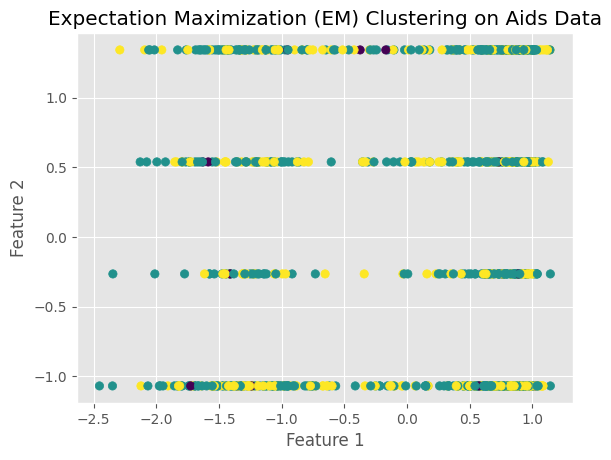

[1 2 2 0 2 2 2 0 1 0 0 0 1 1 0 1 2 0 0 1 1 1 0 1 1 1 0 1 1 1 1 1 1 0 2 2 2
 0 2 0 0 1 1 1 0 0 1 1 1 2 0 1 0 2 2 0 2 0 0 0 1 0 0 1 0 1 0 1 0 0 1 1 0 0
 0 0 0 2 1 1 0 0 0 1 0 2 2 1 1 2 1 0 1 0 2 2 1 1 1 1 1 1 2 0 2 1 2 1 1 1 2
 0 0 0 2 2 2 2 0 1 2 2 2 0 2 2 1 1 2 0 2 0 2 2 1 0 0 0 1 1 1 1 0 0 2 0 2 1
 1 2 1 1 1 0 1 2 1 1 1 1 2 2 0 0 2 2 0 1 1 1 1 2 2 1 0 2 0 1 0 2 1 1 0 1 0
 1 1 1 0 2 1 2 1 1 2 0 1 0 0 2 2 1 1 1 0 1 1 2 2 1 2 0 0 0 2 2 2 0 1 0 1 2
 1 2 1 0 1 0 1 2 1 0 2 2 2 2 1 1 0 2 1 2 0 0 1 2 2 1 1 0 0 2 1 2 0 1 1 2 1
 1 1 2 0 2 1 0 1 1 2 1 1 0 0 1 2 2 2 1 1 0 0 0 2 1 0 2 2 2 2 2 1 2 0 1 2 1
 0 1 0 2 2 0 1 1 1 1 2 0 1 0 1 0 1 1 1 1 2 2 1 1 1 2 2 0 0 2 1 0 2 0 1 0 0
 2 2 1 1 0 0 0 0 1 1 1 1 1 0 2 1 2 1 0 1 0 1 1 1 1 1 2 0 2 0 0 0 0 0 1 0 2
 2 1 1 2 1 0 2 2 2 1 2 2 2 0 0 1 1 1 1 1 1 1 1 0 1 0 0 2 1 0 1 0 0 2 1 1 1
 2 0 2 1 2 1 1 1 1 1 1 1 0 2 1 1 1 0 1 2 1 0 0 1 1 0 0 1 0 1 1 0 2 1 2 1 2
 2 1 1 2 0 1 1 2 1 0 1 0 2 0 2 1 0 0 1 2 1 2 0 1 2 2 2 1 2 1 2 1 1 1 1 1 1
 0 1 0 0 1 0 1 0 2 1 1 2 

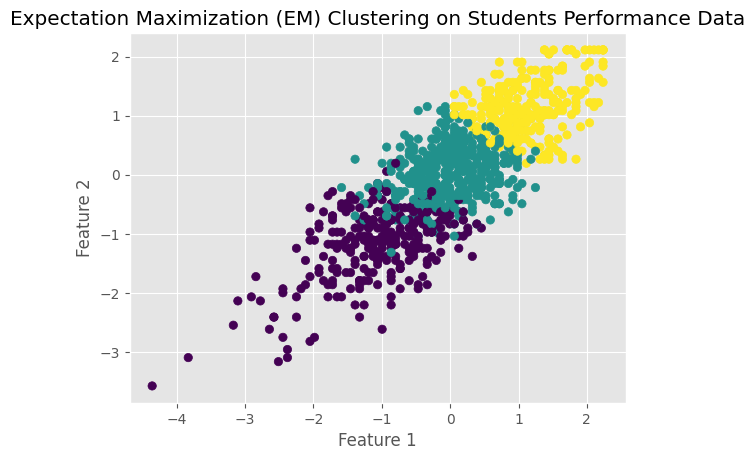

In [30]:
# Expectation Maximization (EM)

from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler

# Preprocess the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_aids)

# Initialize the EM algorithm with 3 clusters
model = GaussianMixture(n_components=3)

# Fit the model to the data
model.fit(X_scaled)

# Predict the cluster labels
cluster_labels = model.predict(X_scaled)

# Print the cluster labels
print(cluster_labels)

plot = plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=cluster_labels, cmap='viridis')
plt.title('Expectation Maximization (EM) Clustering on Aids Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

# on Students Performance dataset
X_thy_scaled = scaler.fit_transform(df_thy)
model.fit(X_thy_scaled)
cluster_labels = model.predict(X_thy_scaled)
print(cluster_labels)

plt.scatter(X_thy_scaled[:, 0], X_thy_scaled[:, 1], c=cluster_labels, cmap='viridis')
plt.title('Expectation Maximization (EM) Clustering on Students Performance Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[2 0 1 0 0 0 0 2 0 1 2 0 0 0 2 0 0 0 2 0 0 0 0 0 2 0 1 2 0 0 2 0 0 0 0 1 2
 0 0 0 1 0 1 2 0 0 1 0 0 2 1 1 1 0 0 0 0 2 1 1 0 1 1 0 1 0 0 0 1 1 2 0 0 2
 0 1 0 1 0 2 2 0 0 0 0 0 2 0 0 0 0 0 0 2 1 0 0 0 0 0 2 0 1 0 0 2 0 0 0 1 1
 1 0 0 0 2 1 0 1 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 2 0 0 0 0 0 0 0 2 1 0
 0 0 0 1 2 0 0 0 0 0 2 0 0 1 2 0 0 2 0 0 0 0 1 1 0 0 0 2 0 0 0 0 0 0 0 0 0
 2 0 0 0 1 2 2 2 1 0 0 0 0 2 1 0 2 2 0 0 0 0 1 1 2 0 0 0 1 0 1 0 0 2 1 2 0
 1 0 0 0 0 1 1 2 2 0 1 0 0 0 0 0 0 1 1 1 0 2 0 0 0 0 1 0 1 0 0 2 0 2 0 0 2
 0 1 0 2 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 1 0 1 2
 0 1 0 0 2 0 0 1 0 1 2 0 1 2 1 0 0 2 1 0 0 2 0 0 2 0 1 2 0 2 0 0 0 2 2 2 1
 2 2 0 0 0 1 0 0 1 0 0 0 0 0 2 0 2 0 0 2 1 1 2 2 0 0 0 0 0 0 2 1 0 0 0 0 2
 0 1 0 0 1 0 0 1 0 0 0 0 0 1 2 0 1 0 0 0 1 0 1 2 0 0 1 0 1 0 0 2 2 2 0 1 2
 0 1 0 0 2 1 1 0 2 1 1 0 2 0 0 2 0 0 2 1 1 0 2 0 0 0 1 0 0 0 2 0 0 0 0 1 0
 0 0 1 1 1 1 0 0 0 0 1 1 2 0 0 0 2 1 1 0 0 1 0 0 0 1 0 0 0 0 1 0 0 1 2 0 2
 0 0 0 0 0 0 0 0 0 0 0 0 

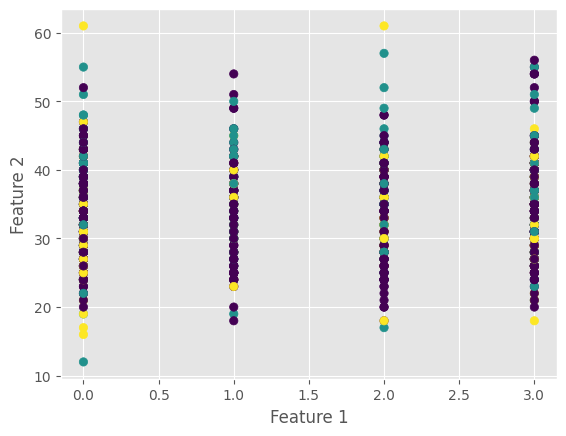

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


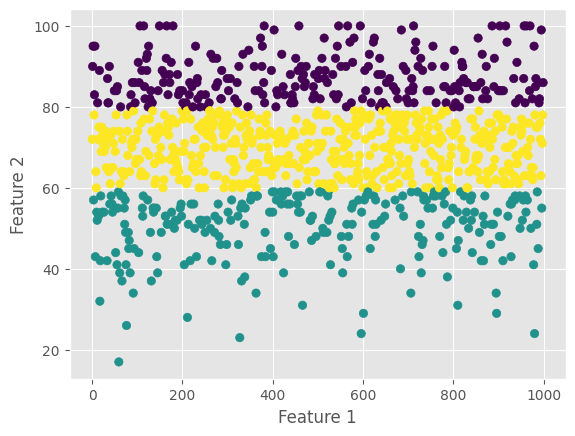

In [35]:
# K-Means Clustering

from sklearn.cluster import KMeans

# Initialize the K-Means algorithm with 3 clusters
kmeans = KMeans(n_clusters=3)

# Fit the model to the data
kmeans.fit(X_aids)

# Predict the cluster labels
cluster_labels = kmeans.predict(X_aids)

# Print the cluster labels
print(cluster_labels)

# Plot
plt.scatter(X_aids[:, 0], X_aids[:, 1], c=cluster_labels, cmap='viridis')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

# Stundent Performance Dataset
kmeans.fit(X_thy)
cluster_labels = kmeans.predict(X_thy)
plt.scatter(range(len(X_thy)), X_thy[:, 0], c=mumbai_cluster_labels, cmap='viridis') # Changed line
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

# Dimensionality Reduction Algorithms

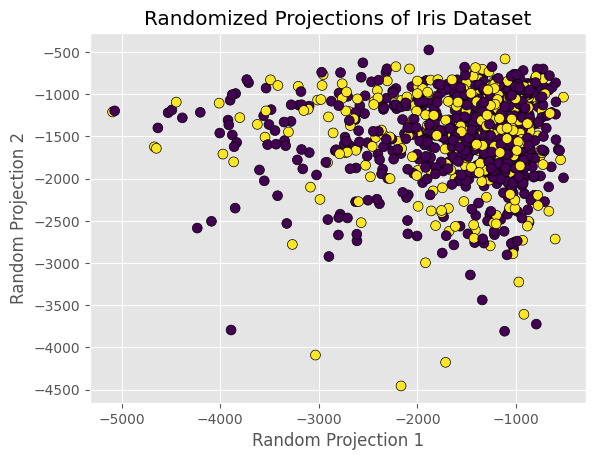

/usr/local/lib/python3.10/dist-packages/sklearn/random_projection.py:398: DataDimensionalityWarning: The number of components is higher than the number of features: n_features < n_components (1 < 2).The dimensionality of the problem will not be reduced.
  warnings.warn(


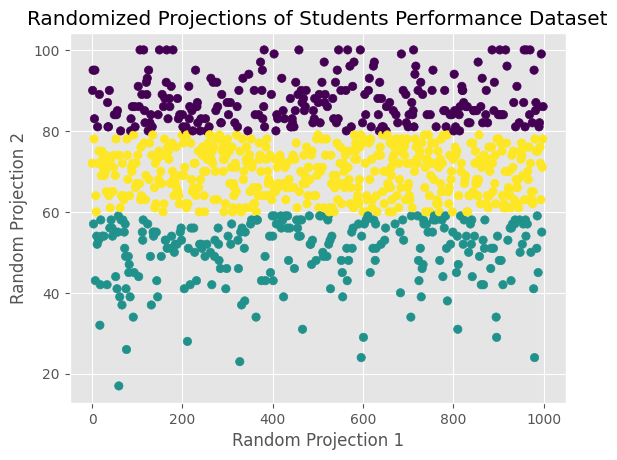

In [36]:
# Randomized Projections (RP)
import matplotlib.pyplot as plt
from sklearn.random_projection import SparseRandomProjection
from sklearn.datasets import load_iris

# Apply Randomized Projections
rp = SparseRandomProjection(n_components=2)
X_rp = rp.fit_transform(X)

# Plot the RP-reduced data
plt.scatter(X_rp[:, 0], X_rp[:, 1], c=y, cmap='viridis', edgecolor='k', s=50)
plt.title('Randomized Projections of Iris Dataset')
plt.xlabel('Random Projection 1')
plt.ylabel('Random Projection 2')
plt.show()

# Stundent Performance
rp.fit(X_thy)
X_rp = rp.transform(X_thy)
plt.scatter(range(len(X_thy)), X_thy[:, 0], c=mumbai_cluster_labels, cmap='viridis')

plt.title('Randomized Projections of Students Performance Dataset')
plt.xlabel('Random Projection 1')
plt.ylabel('Random Projection 2')
plt.show()



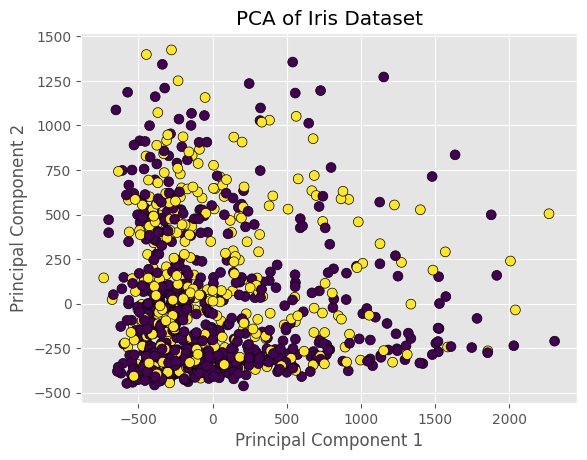

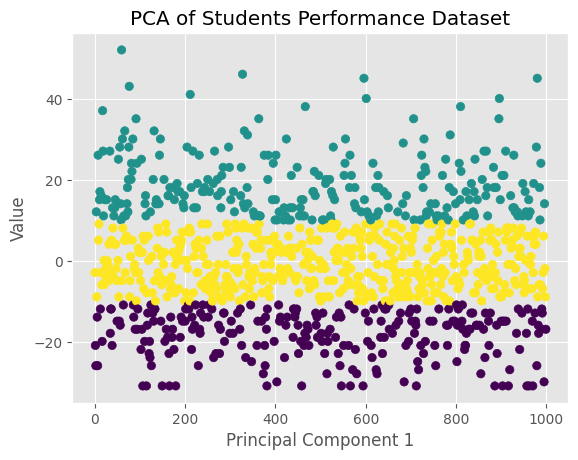

In [38]:
# Principal Component Analysis (PCA)
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris

# Apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Plot the PCA-reduced data
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', edgecolor='k', s=50)
plt.title('PCA of Iris Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

# Stundents
pca = PCA(n_components=1) # Change n_components to 1
X_pca = pca.fit_transform(X_thy)

# Plot the PCA-reduced data
plt.scatter(range(len(X_pca)), X_pca[:, 0], c=mumbai_cluster_labels, cmap='viridis') # Adjusted plotting for 1D PCA

plt.title('PCA of Students Performance Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Value') # Adjusted y-axis label
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:542: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(


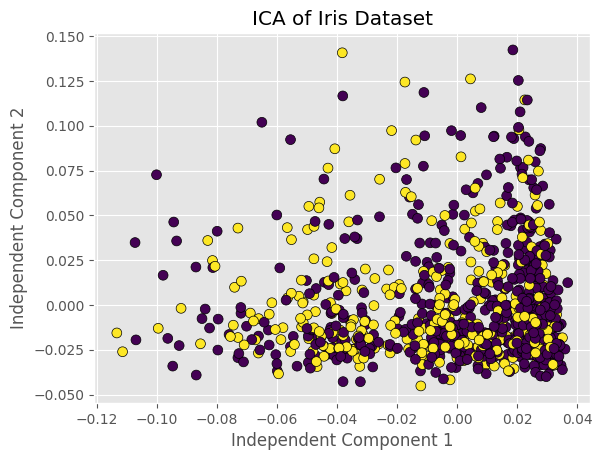

/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:542: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(


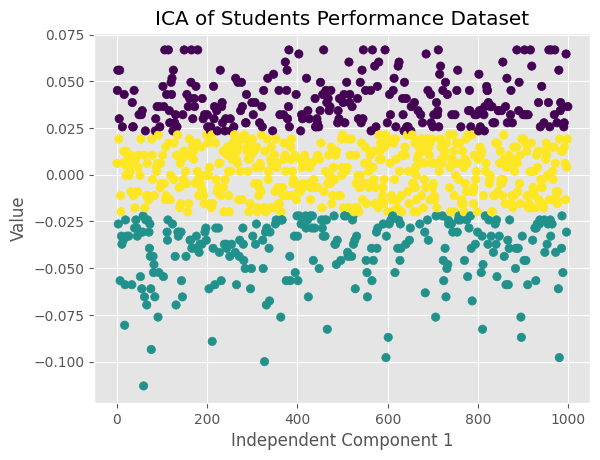

In [39]:
# Independent Component Analysis (ICA)
import matplotlib.pyplot as plt
from sklearn.decomposition import FastICA
from sklearn.datasets import load_iris

ica = FastICA(n_components=2)
X_ica = ica.fit_transform(X)

# Plot the ICA-reduced data
plt.scatter(X_ica[:, 0], X_ica[:, 1], c=y, cmap='viridis', edgecolor='k', s=50)
plt.title('ICA of Iris Dataset')
plt.xlabel('Independent Component 1')
plt.ylabel('Independent Component 2')
plt.show()

# Students
ica = FastICA(n_components=1)
X_ica = ica.fit_transform(X_thy)

# Plot the ICA-reduced data
plt.scatter(range(len(X_ica)), X_ica[:, 0], c=mumbai_cluster_labels, cmap='viridis')
plt.title('ICA of Students Performance Dataset')
plt.xlabel('Independent Component 1')
plt.ylabel('Value')
plt.show()

# Running and Visualizing Combinations


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


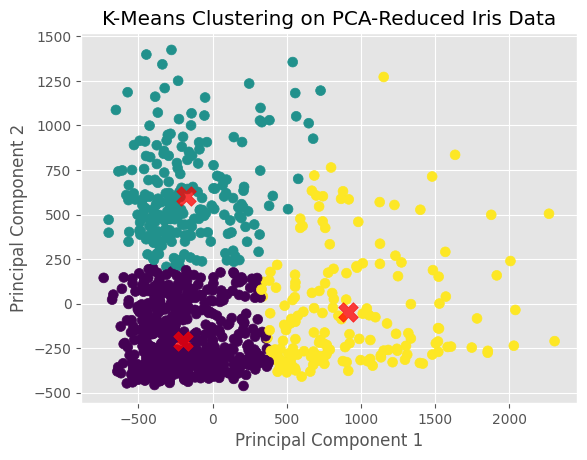

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


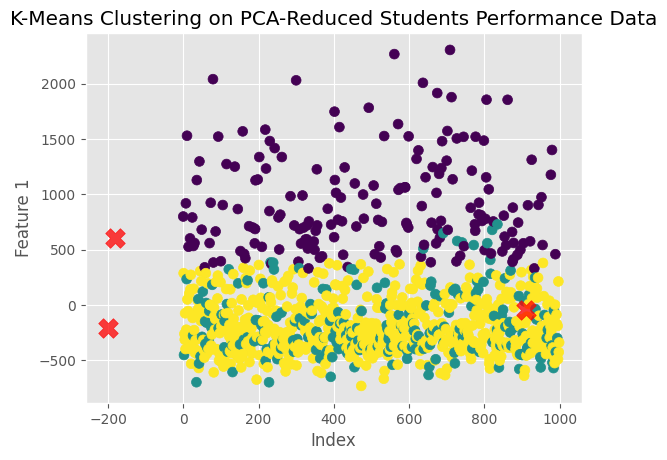

In [40]:
X_pca = PCA(n_components=2).fit_transform(X)
kmeans = KMeans(n_clusters=3)
y_kmeans_pca = kmeans.fit_predict(X_pca)

# Plot the results
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_kmeans_pca, s=50, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', s=200, alpha=0.75, marker='X')
plt.title('K-Means Clustering on PCA-Reduced Iris Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

# Students
X_pca = PCA(n_components=2).fit_transform(X)
kmeans = KMeans(n_clusters=3)
y_kmeans_pca = kmeans.fit_predict(X_pca)

plt.scatter(range(len(X_pca)), X_pca[:, 0], c=y_kmeans_pca, s=50, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', s=200, alpha=0.75, marker='X')
plt.title('K-Means Clustering on PCA-Reduced Students Performance Data')
plt.xlabel('Index')
plt.ylabel('Feature 1')
plt.show()

# Extra Credit

<function matplotlib.pyplot.show(close=None, block=None)>

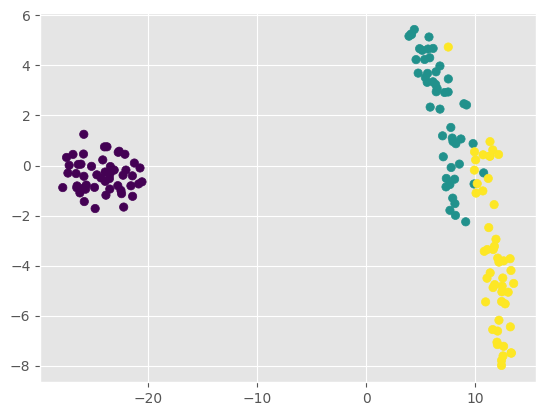

In [11]:
# Non-linear Manifold Learning
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.datasets import load_iris

import numpy as np
import pandas as pd

tsne = TSNE(n_components=2)
iris = load_iris()
X = iris.data
y = iris.target

X_embedded = tsne.fit_transform(X)

plt.scatter(X_embedded[:, 0], X_embedded[:, 1], c=y)
plt.show